# FindDefault (Prediction of Credit Card fraud)

# Problem Statement:

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
We have to build a classification model to predict whether a transaction is fraudulent or not.

In [2]:
# import necessary liabraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Exploratory Data Analysis (EDA)

In [3]:
#load the data
cc_data = pd.read_csv('creditcard.csv')

In [4]:
cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
cc_data.shape

(284807, 31)

In [6]:
#checking missing values
cc_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Summary statistics of numerical columns
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
cc_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


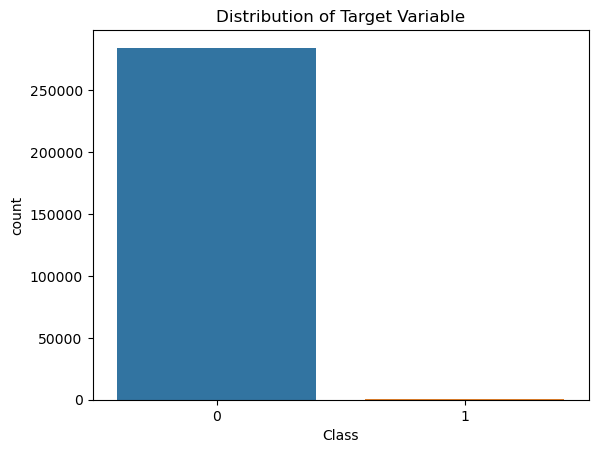

In [51]:
# Distribution of the target variable
sns.countplot(x='Class', data=cc_data)
plt.title('Distribution of Target Variable')
plt.show()

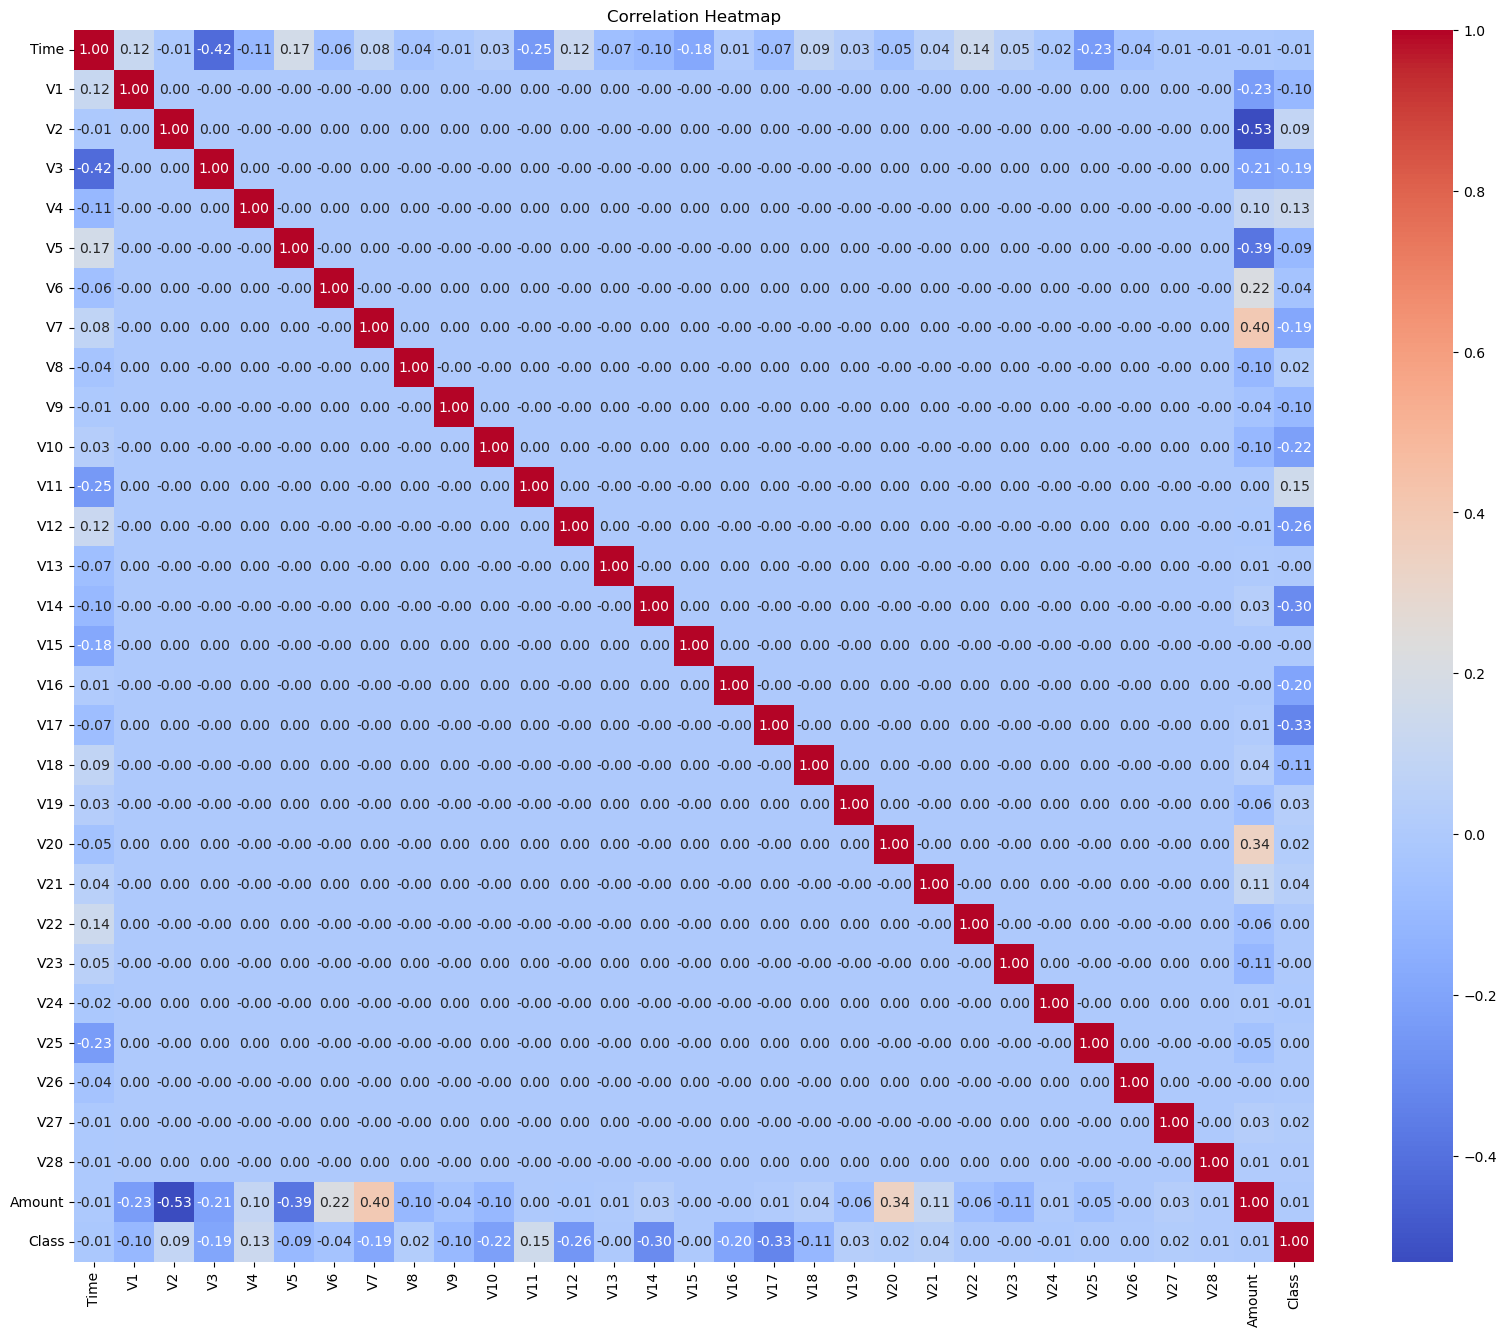

In [10]:
# Correlation heatmap of numerical features
plt.figure(figsize=(20, 16))
sns.heatmap(cc_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

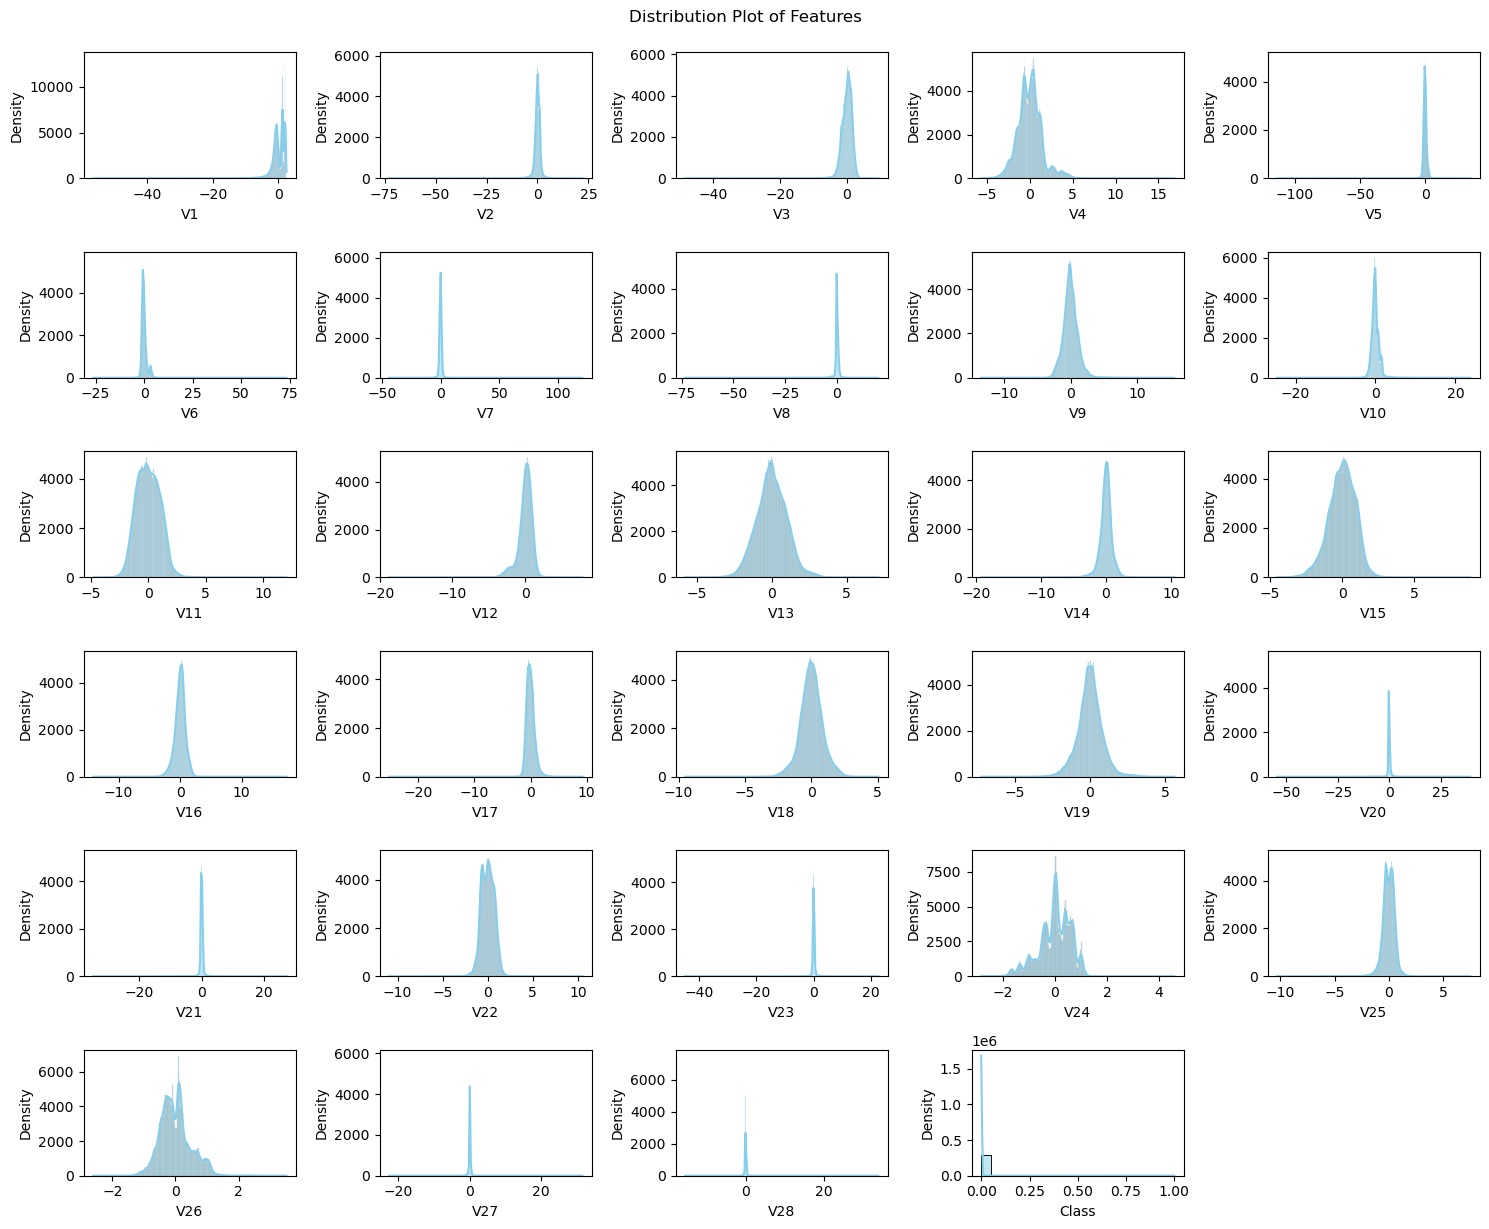

In [11]:
# Create a subset of the DataFrame with selected columns
data_subset = cc_data.drop(columns=['Time', 'Amount'], axis=1)

# Set the figure size for the distribution plots
plt.figure(figsize=(15, 12))

# Create distribution plots for each feature
num_features = len(data_subset.columns)
num_rows = num_features // 5 + (num_features % 5 > 0)  # Calculate number of rows needed based on 5 columns per row
for i, column in enumerate(data_subset.columns):
    plt.subplot(num_rows, 5, i + 1)  # 5 columns per row
    sns.histplot(data_subset[column], kde=True, color='skyblue')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.suptitle('Distribution Plot of Features', y=1.02)
plt.show()

# Split the Data

In [12]:
# Splitting the data
X = cc_data.drop(columns=['Class'], axis=1)
y = cc_data['Class']

In [47]:
X.shape, y.value_counts()

((284807, 30),
 Class
 0    284315
 1       492
 Name: count, dtype: int64)

In [13]:
# Training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Balancing the Data

In [14]:
# Balancing the train and test split data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [15]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

In [42]:
X_train_scaled.shape, X_test_scaled.shape

((454902, 30), (56962, 30))

# Model Selection - Random Forest Classifier


In [16]:
# Intialize and train the model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_jobs=-1)
rf_model.fit(X_train_scaled, y_train_balanced)

RandomForestClassifier(n_jobs=-1)

In [18]:
y_test_pred = rf_model.predict(X_test_scaled)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [20]:
# Evaluation metrics
accuracy_val = accuracy_score(y_test, y_test_pred)
precision_val = precision_score(y_test, y_test_pred)
recall_val = recall_score(y_test, y_test_pred)
f1_val = f1_score(y_test, y_test_pred)
roc_auc_val = roc_auc_score(y_test, y_test_pred)
conf_matrix_val = confusion_matrix(y_test, y_test_pred)

In [21]:
# Print the results - Random Forest
print(f'Best Model Metrics:')
print(f'Accuracy: {accuracy_val}')
print(f'Precision: {precision_val}')
print(f'Recall: {recall_val}')
print(f'F1 Score: {f1_val}')
print(f'ROC AUC: {roc_auc_val}')
print(f'Confusion Matrix:\n{conf_matrix_val}')

Best Model Metrics:
Accuracy: 0.9994382219725431
Precision: 0.84375
Recall: 0.826530612244898
F1 Score: 0.8350515463917526
ROC AUC: 0.9131334124814809
Confusion Matrix:
[[56849    15]
 [   17    81]]


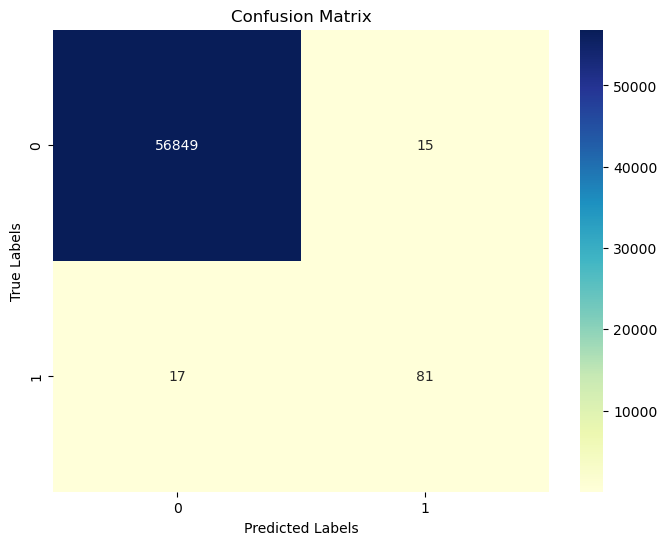

In [34]:
# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['0', '1'])  
plt.yticks([0.5, 1.5], ['0', '1'])  
plt.show()

## Hyperparameter tuning using Grid Search

The ideal way to find a fit for an algorithm is to use Grid search. This is how grid search works:
We create a search space which is a grid of hyperparameter values and evaluate every position in the grid.


Grid search makes sure every possible combination is checked and tries to find the combination which gives the best possible metric and takes a lot of time to execute.

We manually define the range of each hyperparameter that we want to check. 

Below are the exmaples and not tested yet with this dataset



In [34]:
#importing scikit learns' gridsearch
# from sklearn.model_selection import GridSearchCV


In [ ]:
# Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'criterion': ['gini', 'entropy']
# }


In [ ]:
# Initialize the RandomForestClassifier
# rf_clf = RandomForestClassifier()


In [ ]:
# Create a GridSearchCV object with the specified parameter grid and cross-validation folds
# grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5)


In [ ]:
# Fit the grid search to the scaled training data
# grid_search.fit(X_train_scaled, y_train_balanced)


In [ ]:
# Retrieve the best parameters found by the grid search
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)